# ***F1 Racing winner prediction***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [ ]:
data = pd.read_csv("/content/f1_2025_results.csv")

In [ ]:
data.head(100)

,Round,Race,Driver,Team,Grid,Position,Points,Status
0,1,Australian Grand Prix,Lando Norris,McLaren,1,1,25,Finished
1,1,Australian Grand Prix,Max Verstappen,Red Bull,3,2,18,Finished
2,1,Australian Grand Prix,George Russell,Mercedes,4,3,15,Finished
3,1,Australian Grand Prix,Andrea Kimi Antonelli,Mercedes,16,4,12,Finished
4,1,Australian Grand Prix,Alexander Albon,Williams,6,5,10,Finished
...,...,...,...,...,...,...,...,...
95,5,Saudi Arabian Grand Prix,Lance Stroll,Aston Martin,16,16,0,Lapped
96,5,Saudi Arabian Grand Prix,Jack Doohan,Alpine F1 Team,17,17,0,Lapped
97,5,Saudi Arabian Grand Prix,Gabriel Bortoleto,Sauber,20,18,0,Lapped
98,5,Saudi Arabian Grand Prix,Yuki Tsunoda,Red Bull,8,19,0,Retired


In [ ]:
data.shape

(100, 8)

In [ ]:
data.columns

Index(['Round', 'Race', 'Driver', 'Team', 'Grid', 'Position', 'Points',
       'Status'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Round     100 non-null    int64 
 1   Race      100 non-null    object
 2   Driver    100 non-null    object
 3   Team      100 non-null    object
 4   Grid      100 non-null    int64 
 5   Position  100 non-null    int64 
 6   Points    100 non-null    int64 
 7   Status    100 non-null    object
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [ ]:
data.describe()

,Round,Grid,Position,Points
count,100.000000,100.000000,100.000000,100.000000
mean,3.000000,10.500000,10.500000,5.050000
std,1.421338,5.795331,5.795331,7.208826
min,1.000000,1.000000,1.000000,0.000000
25%,2.000000,5.750000,5.750000,0.000000
50%,3.000000,10.500000,10.500000,0.500000
75%,4.000000,15.250000,15.250000,8.500000
max,5.000000,20.000000,20.000000,25.000000


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
Round,0
Race,0
Driver,0
Team,0
Grid,0
Position,0
Points,0
Status,0


# ***TARGET COLUMN***

In [ ]:
data['winner'] = (data['Position']==1).astype(int)

# ***OUTLIER DETECTION***




In [ ]:
num_cols = data.select_dtypes(include=['int64','float64']).columns
cate_cols = data.select_dtypes(include = 'object').columns

In [ ]:
num_cols

Index(['Round', 'Grid', 'Position', 'Points', 'winner'], dtype='object')

In [ ]:
cate_cols

Index(['Race', 'Driver', 'Team', 'Status'], dtype='object')

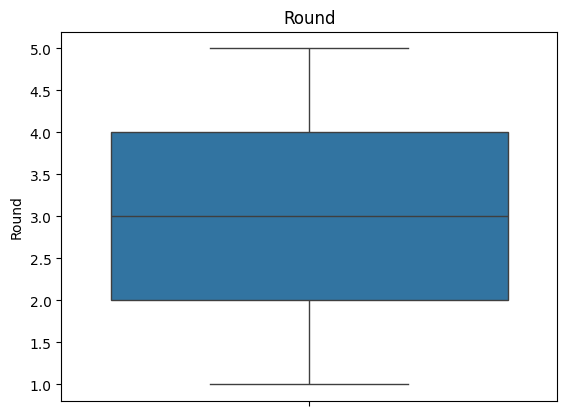

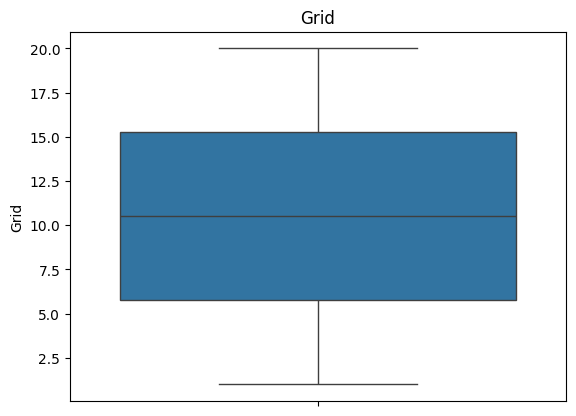

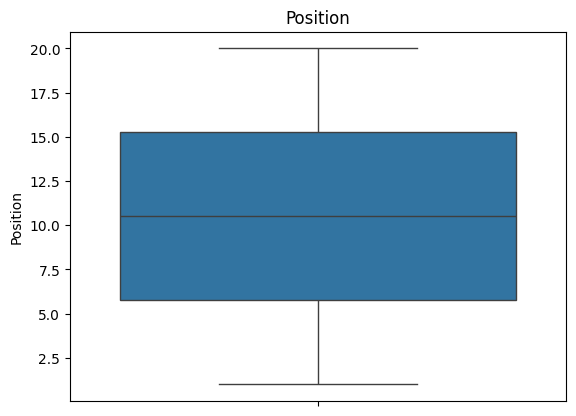

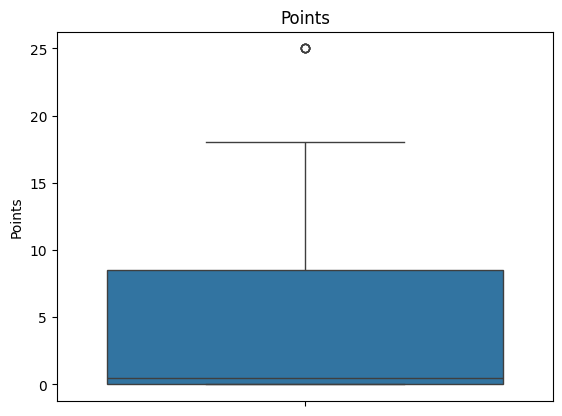

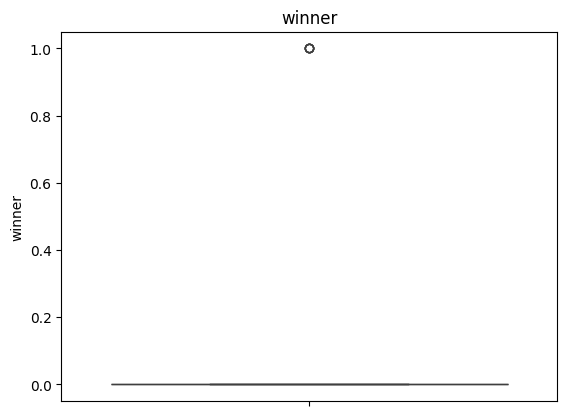

In [ ]:
for i in num_cols:
  sns.boxplot(data=data[i])
  plt.title(i)
  plt.show()

# ***ONE HOT ENCODING***

In [ ]:
from IPython.utils.py3compat import encode
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first' , sparse_output = False , handle_unknown= 'ignore')
encoded_array = ohe.fit_transform(data[cate_cols])
encoded_data =  pd.DataFrame(encoded_array,columns=ohe.get_feature_names_out(cate_cols))
data = data.drop(columns=cate_cols)
data = pd.concat([data.reset_index(drop=True), encoded_data.reset_index(drop=True)], axis=1)

In [ ]:
data.head(10)

,Round,Grid,Position,Points,winner,Race_Bahrain Grand Prix,Race_Chinese Grand Prix,Race_Japanese Grand Prix,Race_Saudi Arabian Grand Prix,Driver_Andrea Kimi Antonelli,...,Team_Haas F1 Team,Team_McLaren,Team_Mercedes,Team_RB F1 Team,Team_Red Bull,Team_Sauber,Team_Williams,Status_Finished,Status_Lapped,Status_Retired
0,1,1,1,25,1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,3,2,18,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,4,3,15,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,16,4,12,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,6,5,10,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,1,13,6,8,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1,17,7,6,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,1,7,8,4,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,1,2,9,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1,8,10,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# ***Train Test Split***

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X =data.drop(columns = ['winner','Position','Points'])
y = data['winner']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2 , random_state = 42 )

In [ ]:
train_temp = pd.concat([X_train, y_train], axis=1)
not_winner = train_temp[train_temp.winner == 0]
winner = train_temp[train_temp.winner == 1]

winner_upsampled = resample(winner, replace=True, n_samples=len(not_winner), random_state=42)
train_balanced = pd.concat([not_winner, winner_upsampled])

X_train_bal = train_balanced.drop('winner', axis=1)
y_train_bal = train_balanced.winner

# ***Model Selection : Random Forest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_1 = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model_1.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
probs = model_1.predict_proba(X_test)[:, 1]

In [ ]:

y_probs = model_1.predict_proba(X_test)[:, 1]
pred_1 = (y_probs >= 0.15).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix




print("Accuracy:", accuracy_score(y_test, pred_1))
print("F1 Score:", f1_score(y_test, pred_1))
print("Precision:", precision_score(y_test, pred_1))
print("Recall:", recall_score(y_test, pred_1))
print(confusion_matrix(y_test, pred_1))

Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
[[18  0]
 [ 0  2]]


In [ ]:
import pickle
from google.colab import files

# Packaging the model, encoder, and feature names
model_data = {
    "model": model_1,
    "encoder": ohe,
    "features": X_train_bal.columns.tolist()
}

# Saving the file
with open("f1_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

# Downloading the file to your computer
files.download("f1_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>